## Getting started: import useful modules

The python functions must be *imported* from modules before called in a program.

A command starts with '```%```' is called a magic command, according to documentatiton:

>Magics are specific to and provided by the IPython kernel. Whether magics are available on a kernel is a decision that is made by the kernel developer on a per-kernel basis. 

In our case, the 

> ```%matplotlib inline```

command will enable Jupyter notebook to show plots generated by matplotlib directly in the notebook

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the friendly manual

When in trouble, always start with reading the manual/documentation -- you may be be surprised how informative they are.

When functions are created in Python, there is an option to include a "docstring", and good libraries/modules always include these for their functions.

In general in Python, you can access the docstring for a function using
> ```help(functionName)``` 
where functionName is the name of the function


However, Jupyter has a better way to read the docstrings in a separate window overlay at the bottom of the browser window. To access it, type
> ```?functionName``` 

or 

> ```?moduleName``` 
for help on a module

Let's start by reading the docstring for the scipy.stats.norm module:

In [18]:
?stats.norm

The docstring for stats.norm lists all of the functions that the stats.norm module provides, and for each one lists the possible parameters

It also provides notes about the distribution in question. For instance, stats.norm contains functions for the Normal distribution (which we call the Gaussian distribution). 

We see that the pdf (probability density function) for the Normal distribution with no parameters is given by
$$
\frac{1}{2\pi} \operatorname{exp}\left( - \frac{x^2}{2} \right)
$$

We also see that when the ``loc`` and ``scale`` parameters are given, then ``norm.pdf(x, loc, scale)`` is identically
equivalent to ``norm.pdf(y) / scale`` with
``y = (x - loc) / scale`` 

Later, we will see that this means that ``loc`` is the mean of the distribution, and ``scale`` is the standard deviation (or ``scale``^2 is the variance) 

Note that the call signature for the cdf function is:
``cdf(x, loc=0, scale=1)``
    Cumulative density function.
    
If we inspect the parameters, we will see that there are 2 different types of parameters. The first is a positional parameter ``x``, and the second type are the keyword parameters indicated by ``loc=0`` and ``scale=1``. Positional parameters are required, but keyword parameters are optional and have the default values shown.  In otherwords, if you type

> stats.norm.cdf(0.5)

it will calculate the same value of the cdf as if you typed

> stats.norm.cdf(0.5,loc=0,scale=1)

Let's try it:

In [22]:
stats.norm.cdf(0.5)

0.69146246127401312

In [23]:
stats.norm.cdf(0.5,loc=0,scale=1)

0.69146246127401312

## A search engine is your friend

Searching for "theCommandYouWantToLearn" plus "documentation" can usuallly bring you to the right page

## Typical methods for continuous distributions in ```scipy.stats```

|method|discription|
|---|---|
|rvs|Random variates (return random values from the distribution).|
|pdf|Probability density function.|
|cdf|Cumulative distribution function.|
|mean|Mean of the distribution.|
|var|Variance of the distribution.|
|std|Standard deviation of the distribution.|
|median|Median of the distribution.|
|sf |Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).|
|ppf|Percent point function (inverse of cdf — percentiles).|
|fit|Parameter estimates for generic data.|




### Example for discrete random variables

> ``` ?stats.poisson```

or look at:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson




In [5]:
?stats.poisson

Note that although the Poisson random variable has only one parameter, ``mu`` (the average number of events -- its mean), the scipy.stats.poisson functions also allow another parameter ``loc``. Here ``loc`` can be used to shift the distribution left or right; this is typical of scipy.stats functions. In general, you can omit ``loc`` for distributions that have only one parameter:

In [7]:
stats.poisson.pmf(1, mu=0.6)

0.3292869816564159

## Typical methods for discrete distributions in ```scipy.stats```

|method|discription|
|---|---|
|rvs|Random variates (return random values from the distribution).|
|pmf|Probability mass function.|
|cdf|Cumulative distribution function.|
|mean|Mean of the distribution.|
|var|Variance of the distribution.|
|std|Standard deviation of the distribution.|
|median|Median of the distribution.|
|sf |Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).|
|ppf|Percent point function (inverse of cdf — percentiles).|





### The complete list of random distributions in ```scipy.stats```

http://docs.scipy.org/doc/scipy/reference/stats.html

## Plotting CDFs, PMFs, and PDFs

Let's plot the CDFs for the Gaussian and Poisson distributions. First generate data linearly over a range where the random variable has most of its probability. For instance, the Gaussian is centered at 0 and with standard deviation 1, will have most probability between -4 and 4. To generate 100 equally spaced values from -4 to 4, we can use numpy's ``linspace`` function:

In [37]:
x = np.linspace(-4, 4, 100)

Now we can evaluate the cdf at each of these points:

In [38]:
cdfvals = stats.norm.cdf(x)

Finally, we can plot the cdf values vs. x using matplotlib:

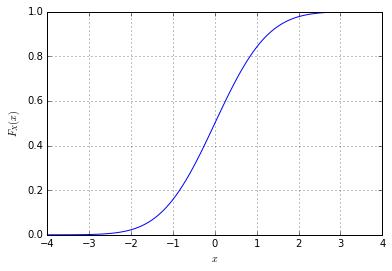

In [39]:
plt.plot(x, cdfvals)
plt.ylabel('$F_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

The Poisson random variable is a non-negative variable, so its support will start at 0. Let's look at the cdf for the Poisson random variable with mu=5:

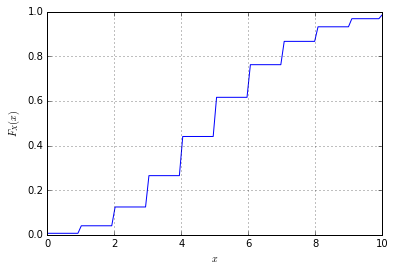

In [40]:
x=np.linspace(0,10,100)
cdfvals=stats.poisson.cdf(x,mu=5)

plt.plot(x, cdfvals)
plt.ylabel('$F_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

As expected, the cdf has a staircase distribution. However, it doesn't look like a nice staircase because matplotlib is using linear interpolation between the points. We can make a nicer graph using matplotlib's ``step`` function:

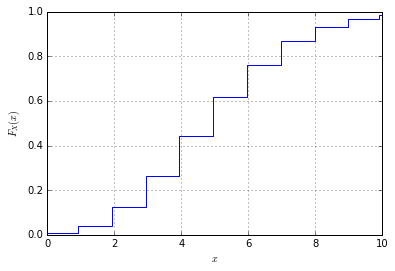

In [41]:
x=np.linspace(0,10,100)
cdfvals=stats.poisson.cdf(x,mu=5)

plt.step(x, cdfvals)
plt.ylabel('$F_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

Now let's plot the PMF for this Poisson. We usually plot PMFs for discrete random variables as stem plots.

Since the Poisson only takes values at nonnegative integers, we should evaluate the PMF at those points:

In [42]:
x=range(11)

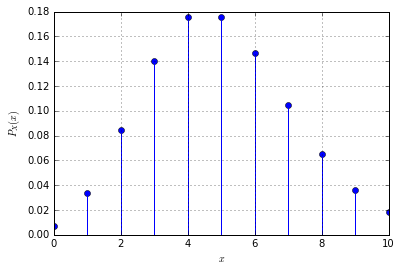

In [43]:
pmfvals=stats.poisson.pmf(x,mu=5)
plt.stem(x, pmfvals)
plt.ylabel('$P_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

Now, let's plot the pdf for the Gaussian random variable with the default parameters:

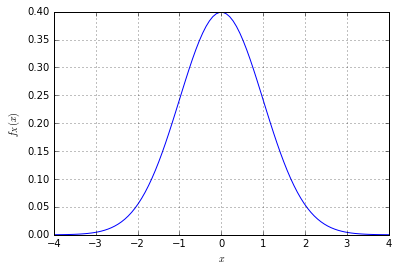

In [44]:
x = np.linspace(-4, 4, 100)
pdfvals = stats.norm.pdf(x)

plt.plot(x, pdfvals)
plt.ylabel('$f_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

## Generating random variables and estimating PMFs and pdfs

Let's begin by generating 100,000 Poisson random variables with mu=5:

In [45]:
p=stats.poisson.rvs(mu=5,size=100000)

Check the average value of these variables:

In [47]:
np.mean(p)

4.9937500000000004

(It is pretty close to 5, which we said was the average number of occurrences)

Now, let's calculate the relative occurence of the values from 0 to 10. 

Now, we can calculate the number of occurences in each bin in several ways. For instance, if we just wanted to count how many times 0 occured, we could compare all the values of p to 0 and then use numpy's ``count_nonzero`` function to count how many times that was true:

In [55]:
np.count_nonzero(p==0)

666

We could use a loop to do this over all the bins, but numpy provides an eaier way.

First create a set of bin edges that go from 0 to 11:

In [58]:
mybins=range(12) #Note to get 11 included in mybins, we need to use 11+1=12 as the limit in the range function

Now call numpy's ``histogram`` function on the data using the specified bins:

In [60]:
phist=np.histogram(p,bins=mybins)
print(phist)

(array([  666,  3308,  8467, 14120, 17633, 17564, 14514, 10530,  6508,
        3574,  2572]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))


Let's plot it and compare to the PMF:

<Container object of 3 artists>

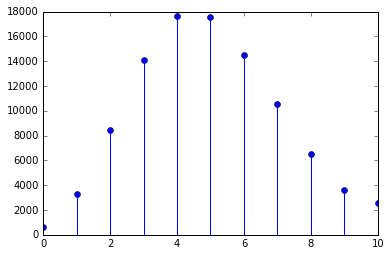

In [66]:
plt.stem(phist[1][:-1],phist[0])

It does have the same shape, but it would be easier to compare if we changed these to relative frequencies. We can do that ourselves by dividing the numbers in the bins by the total number across all bins:

<Container object of 3 artists>

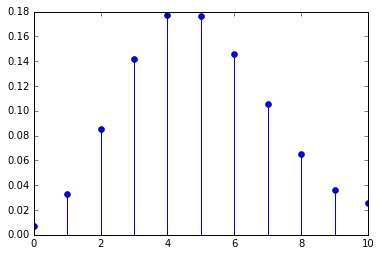

In [72]:
phist2=phist[0]/np.sum(phist[0])

plt.stem(phist[1][:-1],phist2)

We can overlay this with the true histogram to see if they match up:

<Container object of 3 artists>

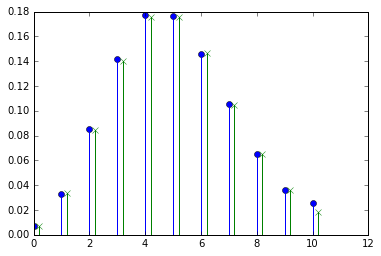

In [104]:
plt.stem(phist[1][:-1],phist2,markerfmt='bo')
#plt.hold(True)
x=range(11)
pmfvals=stats.poisson.pmf(x,mu=5)

# I am slightly offsetting the true PMF values, so that
# both sets of results are visible:
plt.stem(np.array(x)+0.2,pmfvals,'g',markerfmt='gx')


Note that we didn't have to do the normalization ourselves. Numpy can do it for us:

<Container object of 3 artists>

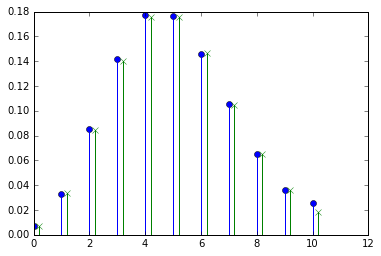

In [105]:
phist=np.histogram(p,bins=mybins,normed=True)

plt.stem(phist[1][:-1],phist[0],markerfmt='bo')
#plt.hold(True)
x=range(11)
pmfvals=stats.poisson.pmf(x,mu=5)

# I am slightly offsetting the true PMF values, so that
# both sets of results are visible:
plt.stem(np.array(x)+0.2,pmfvals,'g',markerfmt='gx')



Finally, we can get a plot of the histogram directly from matplotlib:

(array([ 0.00669643,  0.03326094,  0.08513312,  0.14197233,  0.17729448,
         0.17660071,  0.14593388,  0.10587597,  0.06543597,  0.03593549,
         0.02586068]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

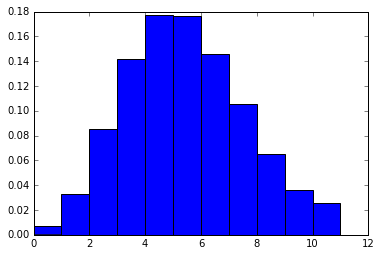

In [107]:
plt.hist(p,bins=mybins,normed=True)

However, the matplotlib version is not a nice stem plot!

Now let's generate some Gaussian random variables and compare them to their pdf:

In [112]:
g = stats.norm.rvs(size=100000) # generate 100000 random numbers with normal distribution

Gaussian random variables can take on any real value, so it does not make sense to count the values. Instead, we need to count the values that occur in intervals. Let's make 50 intervals from -4 to 4:20

In [113]:
mybins=np.linspace(-4,4,20)

Now, we can use the numpy.histogram function to count the values in the bins:

In [115]:
ghist=np.histogram(g,bins=mybins)
print(ghist)

(array([   18,    61,   230,   729,  1859,  4075,  7722, 11627, 15398,
       16598, 15175, 11911,  7610,  4063,  1881,   743,   216,    59,    17]), array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]))


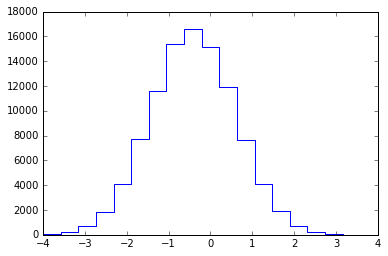

In [118]:
plt.step(ghist[1][:-1],ghist[0])

It looks like a blocky, scaled version of the pdf. If we normalize this in the right way, we can compare it to the pdf. The pdf does not show probabilities. It shows probability densities. So, instead of normalizing so that the values of the bins add to 1, we need to normalize so that the integral over the bins is equal to 1. Since the value over each bin is constant, then the integral over the bin is the value at that bin times the width of the bin. If we denote the bin values by $b_i$ and the bin width by $w$, then we want to find the normalizing constant $c$ such that
$$
c \sum_{i} b_i w = 1 ,
$$
which implies that 
$$
c=\frac{1}{w \sum_i b_i}
$$
Let's test this:

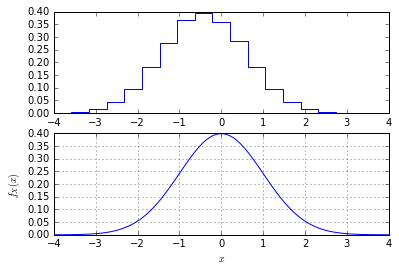

In [122]:
binwidth=mybins[1]-mybins[0]
totalvals=sum(ghist[0])
c=1/binwidth/totalvals

plt.subplot(211) 
plt.step(ghist[1][:-1],ghist[0]*c)

plt.subplot(212)
x = np.linspace(-4, 4, 100)
pdfvals = stats.norm.pdf(x)

plt.plot(x, pdfvals)
plt.ylabel('$f_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

If we increase the number of bins to 50, it looks better

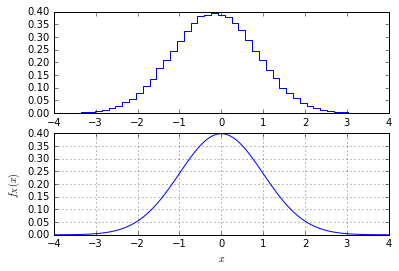

In [125]:
mybins=np.linspace(-4,4,50)
ghist=np.histogram(g,bins=mybins)


binwidth=mybins[1]-mybins[0]
totalvals=sum(ghist[0])
c=1/binwidth/totalvals

plt.subplot(211) 
plt.step(ghist[1][:-1],ghist[0]*c)

plt.subplot(212)
x = np.linspace(-4, 4, 100)
pdfvals = stats.norm.pdf(x)

plt.plot(x, pdfvals)
plt.ylabel('$f_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

However, we have to be careful not to make the bins so small that there is not enough data points in the bins:

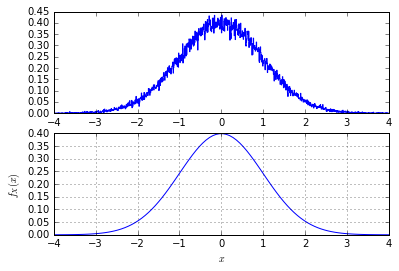

In [127]:
mybins=np.linspace(-4,4,1000)
ghist=np.histogram(g,bins=mybins)


binwidth=mybins[1]-mybins[0]
totalvals=sum(ghist[0])
c=1/binwidth/totalvals

plt.subplot(211) 
plt.step(ghist[1][:-1],ghist[0]*c)

plt.subplot(212)
x = np.linspace(-4, 4, 100)
pdfvals = stats.norm.pdf(x)

plt.plot(x, pdfvals)
plt.ylabel('$f_X(x)$')
plt.xlabel('$x$')
plt.grid(True)

As before, we can generate a histogram directly from matplotlib:

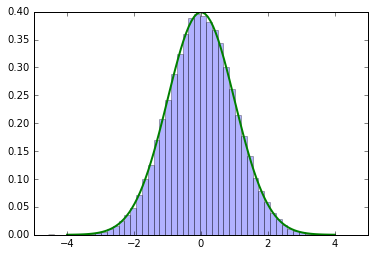

In [133]:
plt.hist(g,bins=50,normed=True,alpha=0.3) # add some transparency
plt.plot(x, pdfvals,'g-',lw=2) # bump up the line width

So, the emperical estimate (from the data) matches the pdf well.

Note that we can also generate a cumulative histogram and compare to the CDF:

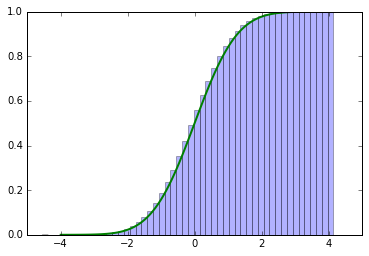

In [134]:
plt.hist(g,bins=50,normed=True,cumulative=True,alpha=0.3) # add some transparency
cdfvals = stats.norm.cdf(x)


plt.plot(x, cdfvals,'g-',lw=2) # bump up the line width